In [1]:
pwd

'/Users/surajpawar/Desktop/Machine Learning_Tensorflow_Diabetes data set'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-08-02 23:00:38.353608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv("/Users/surajpawar/Desktop/Machine Learning_Tensorflow_Diabetes data set/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df[df["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
len(df[df["Outcome"]==1]), len(df[df["Outcome"]==0])

(268, 500)

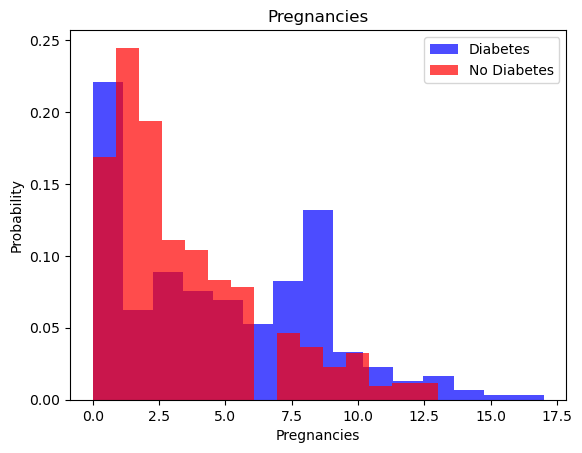

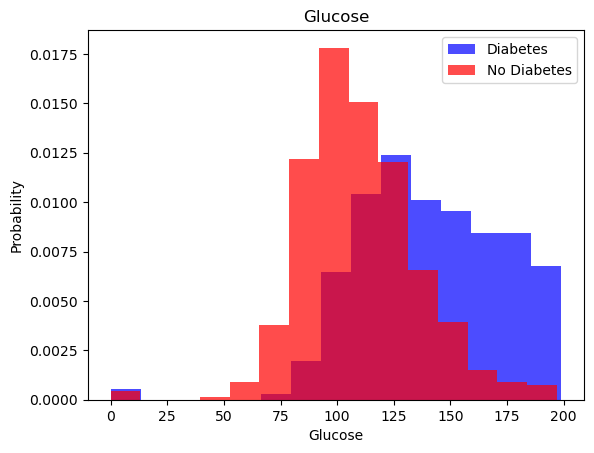

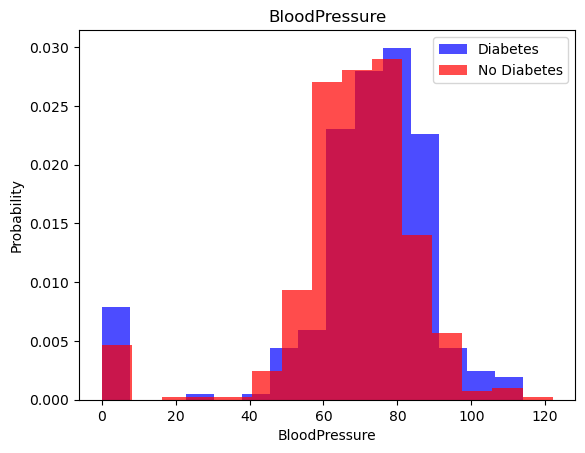

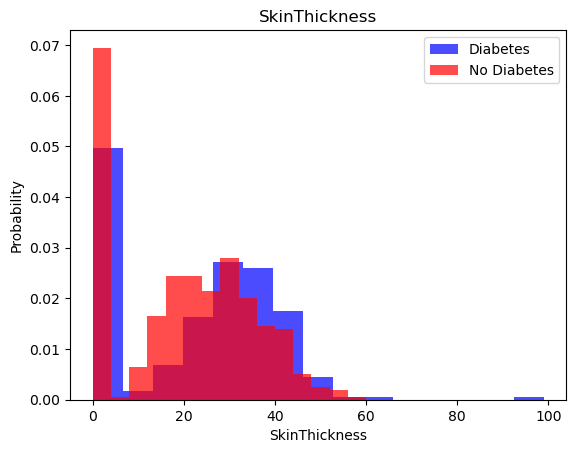

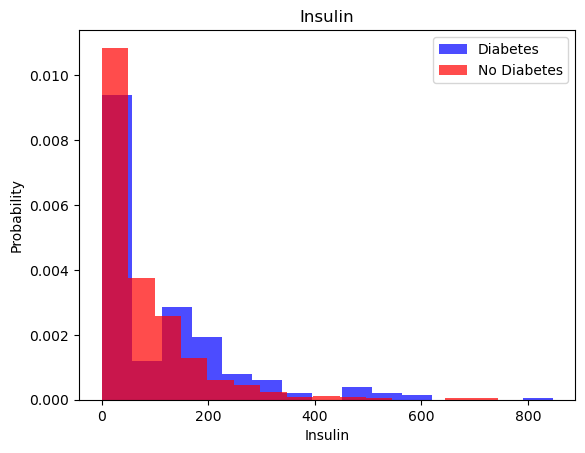

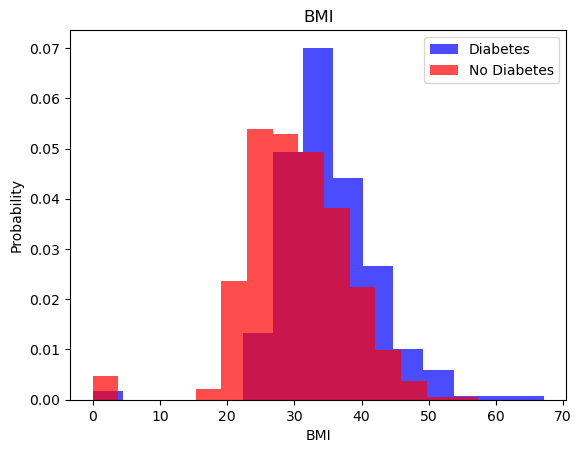

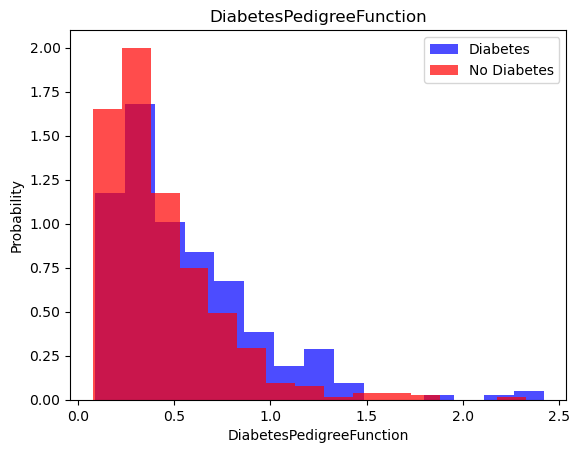

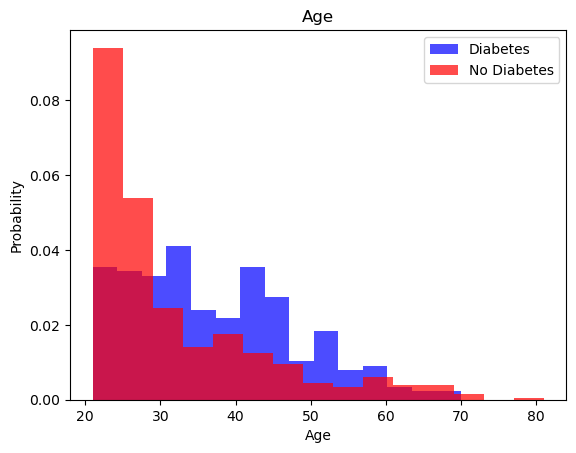

In [13]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df["Outcome"]==1][label], color = "blue", label = "Diabetes", alpha = 0.7, density = True, bins=15)
    plt.hist(df[df["Outcome"]==0][label], color = "red", label = "No Diabetes", alpha = 0.7, density = True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [15]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

In [18]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [19]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
)

In [20]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 0s 2ms/step - loss: 12.1627 - accuracy: 0.3609


[12.162652015686035, 0.36086955666542053]

In [21]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 2ms/step - loss: 11.0358 - accuracy: 0.3312


[11.035758972167969, 0.3311688303947449]

In [22]:
model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 1s 3ms/step - loss: 6.6381 - accuracy: 0.3652 - val_loss: 2.3291 - val_accuracy: 0.4870
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 2.0289 - accuracy: 0.4522 - val_loss: 1.3106 - val_accuracy: 0.4870
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 1.3797 - accuracy: 0.4457 - val_loss: 1.0588 - val_accuracy: 0.4805
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 1.1406 - accuracy: 0.4957 - val_loss: 0.9702 - val_accuracy: 0.5325
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.9986 - accuracy: 0.4957 - val_loss: 0.8447 - val_accuracy: 0.5260
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.5283 - val_loss: 0.8053 - val_accuracy: 0.5584
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.5391 - val_loss: 0.7704 - val_accuracy: 0.5974
Epoch 8/20
29/29 [==

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [27]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [28]:
X.shape, y.shape

((768, 8), (768,))

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)


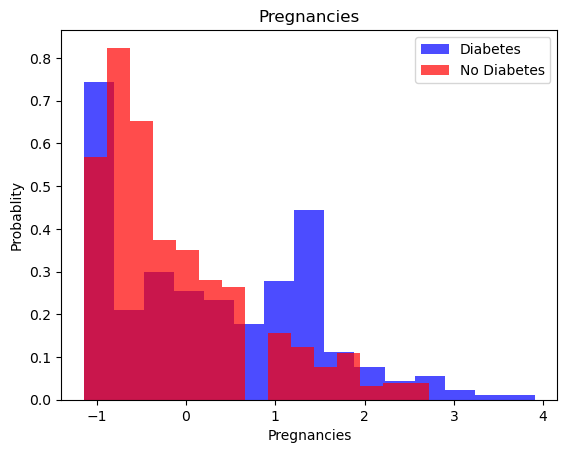

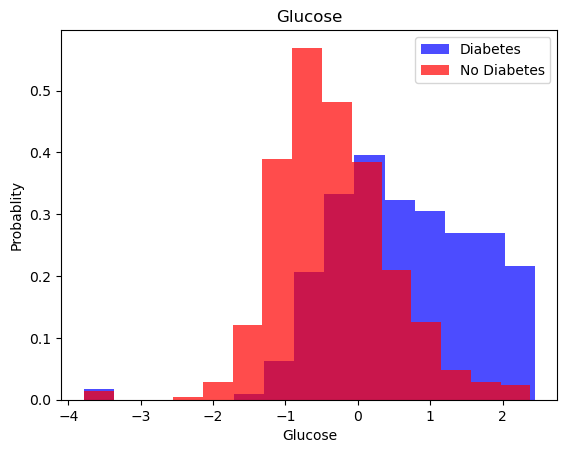

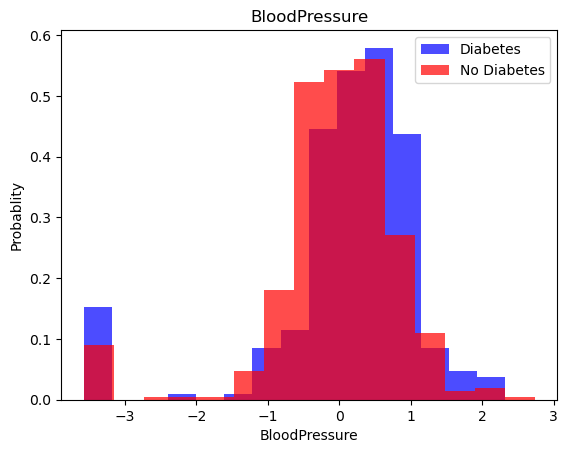

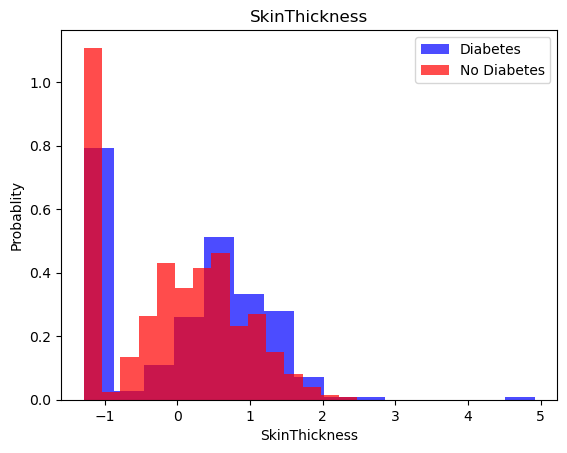

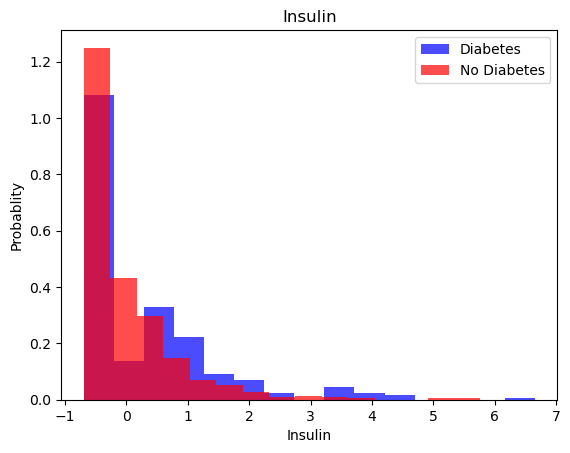

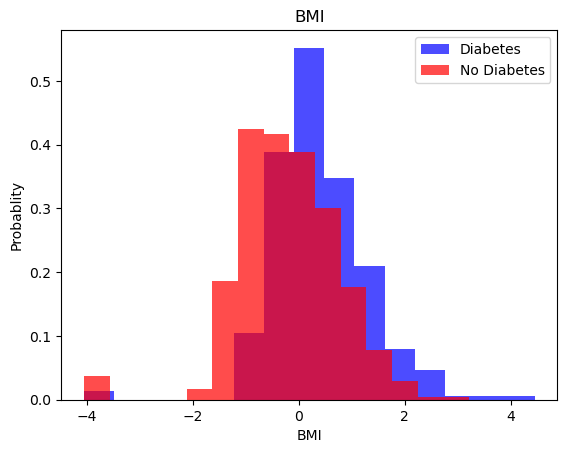

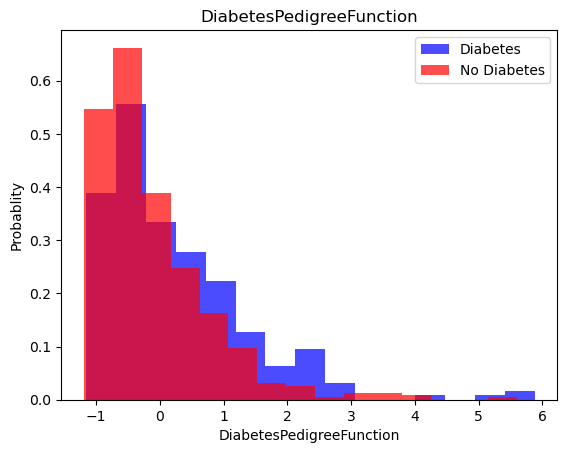

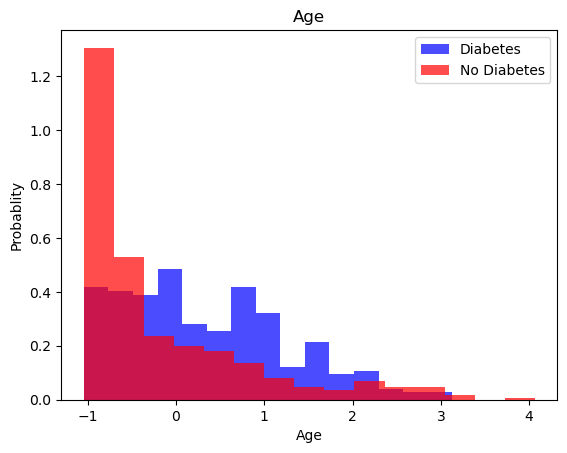

In [31]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df["Outcome"]==1][label], color = "blue", label = "Diabetes", alpha = 0.7, density = True, bins = 15)
    plt.hist(transformed_df[transformed_df["Outcome"]==0][label], color = "red", label = "No Diabetes", alpha = 0.7, density = True, bins = 15)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probablity")
    plt.legend()
    plt.show()

In [33]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [36]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

In [38]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
)

In [40]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 952us/step - loss: 0.7121 - accuracy: 0.5050


[0.7121084928512573, 0.5049999952316284]

In [41]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.4750


[0.708686888217926, 0.4749999940395355]

In [42]:
model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.6776 - accuracy: 0.5850 - val_loss: 0.6421 - val_accuracy: 0.6350
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6700 - val_loss: 0.6005 - val_accuracy: 0.6650
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7017 - val_loss: 0.5743 - val_accuracy: 0.6800
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7150 - val_loss: 0.5507 - val_accuracy: 0.6950
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7300 - val_loss: 0.5349 - val_accuracy: 0.7000
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7367 - val_loss: 0.5198 - val_accuracy: 0.7150
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7433 - val_loss: 0.5073 - val_accuracy: 0.7300
Epoch 8/20
38/38 [==

In [43]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8000


[0.44617748260498047, 0.800000011920929]